# Práctica Obligatoria Spark

La práctica es la siguiente:

Planteamiento, diseño e implementación de una solución a un problema de análisis de datos utilizando Spark. El dataset sobre el que trabajar será el que proporciona el ayuntamiento de Madrid del uso del sistema de bicicletas de préstamo BICIMAD. Nosotros hemos estado utilizando, en los ejercicios de clase, datos relativos a un único mes, pero pueden encontrarse los datos entre desde abril de 2017, por lo que los análisis pueden ser mucho más amplios. Además de ser un dataset conocido, el modelo subyacente en los datos  son grafos, que son muy naturales matemática y computacionalmente hablando.

La práctica se realizará en grupo y el resultado del trabajo constará al menos de:

   * Definición clara y precisa del problema a resolver,
   *  el diseño y la implementación en Spark de la solución al problema propuesto,
   * y un documento que recoja y explique el problema, el proceso de diseño e implementación de la solución y su aplicación a los resultados.
   * El documento asociado a la práctica tiene un formato libre, puede ser un documento pdf, html, notebook... El objetivo fundamental del mismo es que explique con claridad tanto el problema como la solución al mismo. Algunos aspectos que puede ser interesante tratar en el documento para contribuir a su claridad son: motivación, ejemplos,  detalles importantes de la implementación, evaluación de resultados, etc. 

# La función de este script es resumir todos los ejercicios y problemas resueltos

Como hemos estado resolviendo varios problemas los vamos a ir añadiendolos

## Problema 1
La empresa gestora de BiciMad se encuentra ante un problema que busca resolver a través de un estudio centrado en las edades y el tiempo promedio de viaje de sus usuarios. El propósito de este estudio es doble: por un lado, utilizar estos datos como criterios para su expansión a nuevas zonas y, por otro lado, establecer una promoción especial que ofrece un descuento a los usuarios.

Para activar esta promoción, se ha decidido establecer un requisito específico: los usuarios deberán alcanzar un tiempo medio de uso determinado. De esta manera, se busca no solo incentivar un mayor uso de BiciMad, sino también promover el disfrute de los servicios que la empresa ofrece.

Este análisis de las edades y los tiempos promedio de viaje proporcionará a BiciMad información valiosa para la toma de decisiones estratégicas. Con estos datos, la empresa podrá identificar áreas con una demanda más significativa, optimizar su expansión y, en última instancia, brindar un servicio más completo y adaptado a las necesidades de sus usuarios.

#### Para ello usaremos el siguiente script

`conteo_rango_edades.py`: lee una serie de base de datos en las que se encuentre información relacionada con ageRange, y se realiza un diagrama de los sectores, además calcula el tiempo medio de viaje.

 __observación__: para este análisis se han realizados dos caso:
 
 <ol>
 <li> Sin filtrado de datos: tomando directamente los datos </li>
 <li> Filtrando datos que consideramos poco importantes: una limpieza de datos, que se resume en eliminar los usuarios con edad no registrado </li>
 </ol>

In [2]:
!python3 conteo_rango_edades.py "DatosDeUso_12_2020.json"

23/05/17 19:56:02 WARN Utils: Your hostname, ubuntu22 resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/05/17 19:56:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/17 19:56:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
[337, 190, 354, 554, 774, 921, 233, 1020, 1209, 544, 874, 619, 315, 1072, 9149, 9240, 9366, 9286, 10121, 10291, 10346, 530, 427, 795, 581, 295, 875, 401, 700, 733, 1707, 3282, 1759, 3848, 3849, 7750, 7755, 8571, 8583, 383, 382, 1298, 496, 237, 604, 151, 210, 1061, 257, 663, 581, 226, 533, 722, 780, 811, 3317, 1259, 2528, 343, 526, 1100, 983, 600, 360, 812, 465, 295, 687, 793, 792, 190, 314, 717, 745, 420, 213, 271, 215, 393, 1215, 783, 1409, 3857, 1417, 407, 252, 453, 524, 421, 414, 810, 208

Ahora vamos a abrir dos imágenes una con un filtrado de datos y otro sin él

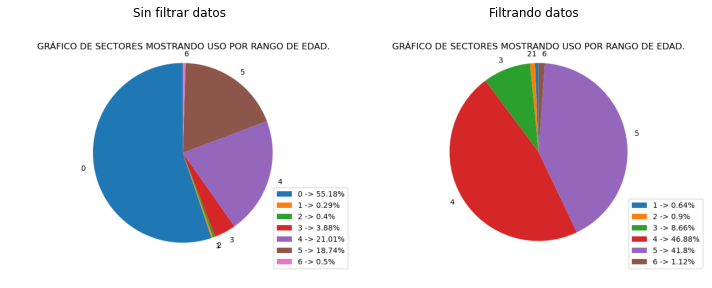

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar las imágenes
imagen1 = mpimg.imread('comparacion_rango_edades.png')
imagen2 = mpimg.imread('comparacion_rango_edades_filtrado.png')

# Crear una figura y agregar subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar las imágenes en los subplots
axes[0].imshow(imagen1)
axes[0].axis('off')
axes[0].set_title('Sin filtrar datos')

axes[1].imshow(imagen2)
axes[1].axis('off')
axes[1].set_title('Filtrando datos')

# Ajustar la distribución de los subplots
plt.tight_layout()

# Mostrar la figura con las imágenes
plt.show()


Teniendo en cuenta lo siguiente:

#### En relación a la edad:
* 0: No se ha podido determinar el rango de edad del usuario
* 1: El usuario tiene entre 0 y 16 años
*    2: El usuario tiene entre 17 y 18 años
*    3: El usuario tiene entre 19 y 26 años
*    4: El usuario tiene entre 27 y 40 años
*    5: El usuario tiene entre 41 y 65 años
*    6: El usuario tiene 66 años o más


Conclusiones:

* La mayoría de los usuarios no tienen registrado la edad. Por lo tanto, se sugiere considerar la posibilidad de realizar una promoción o incentivo para obtener más datos sobre los usuarios y poder personalizar las ofertas y servicios.

* Observando la imagen proporcionada en la celda anterior, se puede notar que la mayoría de los usuarios registrados se encuentran en los grupos 4 y 5, correspondientes a edades entre 27 y 65 años. Esto indica que BiciMad tiene una buena aceptación en este rango de edad y puede enfocar sus estrategias de marketing y expansión en esta audiencia.

* Los grupos 1 y 2, correspondientes a usuarios menores de edad, muestran una baja representación en los registros. Para captar y fidelizar a este grupo de usuarios jóvenes, se sugiere considerar la implementación de viajes gratuitos o bonos especiales que les brinden beneficios exclusivos. Esto ayudaría a generar interés y crear una base de usuarios sólida desde temprana edad.


#### En relación al tiempo medio de viaje:

Tenemos el dato de que el tiempo medio de viaje es 1056.55 segundos, que son 17.61 minutos.

Teniendo en cuenta esta información, la empresa ha decidido poner en marcha una estrategia de descuento como incentivo para sus usuarios. La idea es utilizar el tiempo medio de viaje como criterio para determinar qué usuarios podrán acceder a este descuento especial. Aquellos usuarios que cumplan con el tiempo medio establecido serán beneficiados con una reducción en el costo de sus viajes.

Esta estrategia de descuento basada en el tiempo medio de viaje tiene múltiples ventajas para la empresa. En primer lugar, fomenta un mayor uso de BiciMad al incentivar a los usuarios a realizar viajes más prolongados. Esto a su vez contribuye a un mayor tiempo de uso de las bicicletas y, potencialmente, a un aumento en los ingresos generados por el servicio.

Además, esta estrategia permite recopilar información valiosa sobre los hábitos de uso de los usuarios. Al monitorear el tiempo medio de viaje y analizar los datos resultantes, la empresa puede obtener insights sobre las preferencias de los usuarios, los patrones de movilidad y las áreas de mayor interés. Esta información puede ser utilizada para mejorar la planificación de rutas, optimizar la distribución de estaciones y enfocar los esfuerzos de expansión en las áreas de mayor demanda.

# -----------------------------------------------------------------------------------------------------------------

## Problema 2

Uno de los problemas que enfrenta la empresa gestora de BiciMad es la falta de visibilidad y comprensión sobre las estaciones más concurridas y los trayectos más populares a lo largo del día. Sin esta información, resulta difícil tomar decisiones estratégicas para mejorar la oferta de servicios y optimizar la ubicación de las estaciones en función de la demanda real.

Para ello utilizaremos el siguiente script: `mapaDay.py`

Primero, el programa guarda las posiciones ([longitude,latitude]) y los identificadores de las estaciones activas para el día específico que se ha introducido como valor de entrada, y hace lo propio con las variables idplug_station (estación de enganche) e idunplug_station (estación de desenganche) del fichero que guarda los movimientos de los usuarios conectados a la red de Bicimad.

Con esta información se evalúa cuáles han sido las estaciones más concurridas a lo largo del día introducido, y utilizando la librería de visualización geoespacial folium presentamos esta información en un mapa de forma que se pueda acceder a la información de enganches y desenganches de todas las estaciones, así como proporcionar una representación que (mediante una escala de color) permita conocer cuáles son las estaciones de mayor interés. Es importante remarcar que el formato de los archivos JSON debe ser el que siguen los archivos del año 2020 (véanse DatosDeUso_12_2020.json y SituacionesEstaciones12_2020.json como posibles referencias) de libre acceso en la página web de la EMT de Madrid https://opendata.emtmadrid.es/Datos-estaticos/Datos-generales.

Además, se han delineado los trayectos con más apariciones en el conjunto de datos de uso de los cuáles se ha seleccionado top = 500 para visualizar las 500 rutas más concurridas a lo large de ese día, junto con la información de las estaciones explicada en el párrafo anterior. Si se desea, este valor puede cambiarse dentro del código para reducir o aumentar el número de rutas a considerar.

In [16]:
!python3 mapaDay.py "DatosDeUso_12_2020.json" "SituacionesEstaciones12_2020.json" "2020-12-01.html" "mapa_madrid.html"

23/05/17 20:46:51 WARN Utils: Your hostname, ubuntu22 resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/05/17 20:46:51 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/17 20:46:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
DatosDeUso_12_2020.json SituacionesEstaciones12_2020.json 2020-12-01.html mapa_madrid.html
Traceback (most recent call last):                                              
  File "/home/david/Escritorio/BiciMad/Ejercicios/mapaDay.py", line 136, in <module>
    main(sc, usage_file, stations_file, day, outfile)
  File "/home/david/Escritorio/BiciMad/Ejercicios/mapaDay.py", line 84, in main
    n = max([max(d.keys()) for d in result2])
ValueError: max() arg is an empty sequence



**Solución**:

Para abordar este problema, se ha desarrollado un programa que utiliza datos de posicionamiento y movimientos de los usuarios para identificar las estaciones más concurridas y visualizar esta información en un mapa interactivo. La solución se basa en los siguientes pasos:

Recopilación de datos: El programa recopila información sobre las posiciones (longitude, latitude) y los identificadores de las estaciones activas para el día específico proporcionado como entrada. Además, se obtienen los datos de las estaciones de enganche y desenganche de los usuarios conectados a la red de BiciMad.

 Evaluación de las estaciones más concurridas: Utilizando los datos recopilados, se analiza cuáles han sido las estaciones más concurridas a lo largo del día. Esto se realiza teniendo en cuenta tanto las estaciones de enganche como las de desenganche de los usuarios. Esta evaluación proporciona una visión clara de las áreas de mayor interés y demanda en la red de BiciMad.

Visualización en un mapa interactivo: Se utiliza la librería de visualización geoespacial folium para presentar la información recopilada en un mapa interactivo. El mapa muestra todas las estaciones y permite acceder a la información de enganches y desenganches de cada una. Además, se utiliza una escala de color para resaltar las estaciones de mayor interés, lo que facilita la identificación visual de las áreas más concurridas.

Delineación de trayectos populares: Se seleccionan los trayectos más frecuentes en el conjunto de datos de uso. El programa permite ajustar el parámetro "top" para determinar el número de rutas a considerar. Por defecto, se visualizan las 500 rutas más concurridas del día. Esta información complementa la visualización de las estaciones, brindando una comprensión más completa de los patrones de movimiento de los usuarios.

Esta solución permite a la empresa gestora de BiciMad obtener una visión clara de las estaciones más concurridas y los trayectos populares, lo que facilita la toma de decisiones estratégicas. Con esta información, la empresa puede optimizar la ubicación de las estaciones, ajustar la oferta de servicios en áreas de mayor demanda y mejorar la experiencia global de los usuarios. Además, la visualización en un mapa interactivo brinda una forma intuitiva de acceder y comprender la información, facilitando la identificación de patrones y tendencias importantes.
